In [1]:
# did not sync the repo correctly; do this in order to avoid conficts
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def potential(f1, l, pi, r):
    a, b = 1/4, -1/3
    c = (r+pi)/(2*l)
    d = -pi/l
    return a*f1**4 + b*f1**3 + c*f1**2 + d*f1

def deriv_potential(f1, l, pi, r): # minus this is the ODE
    a, b = 1, -1
    c = (r+pi)/l
    d = -pi/l
    return a*f1**3 + b*f1**2 + c*f1 + d

def sols_deriv_potential_pi0(l, r): # a part from 0
    sqrtVal = np.sqrt(1 - 4*r/l)
    return (1+sqrtVal)/2, (1-sqrtVal)/2

def sols_deriv_potential(l, pi, r): 
    a, b = 1, -1
    c = (r + pi)/l
    d = -pi/l
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            root0 = complex(0,np.sqrt(-1*radicand0))
        else:
            root0 = complex(np.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, np.sqrt(3))/2
    f_roots, f_roots_Re = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        f_roots.append(f0_root), f_roots_Re.append(f0_root.real)
    return f_roots_Re, f_roots

# pi = 0

In [ ]:
l, pi = 1, 0
f1s = np.arange(0.0, 1.01, 0.01)

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(1/3, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(2/3, ls='-.', lw=0.8, color='xkcd:gray')

rs, label_rs = [1/3, 1/4, 2/9, 1/5], ['1/3', '1/4', '2/9', '1/5']
for r,label in zip(rs, label_rs):
    pot = potential(f1s, l, pi, r)
    ln, = ax.plot(f1s, pot, label=label)
    if r<=1/4:
        sols_f1 = np.array(sols_deriv_potential_pi0(l, r))
        ax.scatter(sols_f1, potential(sols_f1, l, pi, r), marker='o', edgecolors=ln.get_color(), color='xkcd:white')

ax.legend(title=r'$ r/ \lambda, \; \pi = 0 $', frameon=False)
ax.set_ylim(-0.01, 0.02)
ax.set(xlabel=r'$f_1$', ylabel=r'$\psi$')
fig.savefig('potential_pi0_var_rl.png')

# pi != 0

In [3]:
def poly3_magic_pi(pi, l, r):
    a = 4
    b = 4*(3*r + 2*l)
    c = 4*(3*r**2 + l**2 - 5*l*r)
    d = 4*r**3 - l*r**2
    return a*pi**3 + b*pi**2 + c*pi + d # tonteria, aixo es el que has calculat abans delta1**2 - delta0**3

def poly3_magic_pi_sols(l, r):
    a = 4
    b = 4*(3*r + 2*l)
    c = 4*(3*r**2 + l**2 - 5*l*r)
    d = 4*r**3 - l*r**2
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            root0 = complex(0,np.sqrt(-1*radicand0))
        else:
            root0 = complex(np.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, np.sqrt(3))/2
    roots, roots_Re = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        roots.append(f0_root), roots_Re.append(f0_root.real)
    return roots_Re, roots

# to analyze the internal parts of the 3rd deg poly in order to see when it becomes complex;
def poly3_Deltas(l,r,pi):
    a, b = 1, -1
    c = (r + pi)/l
    d = -pi/l
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    return delta0, delta1

[(3.700743415417188e-17-3.700743415417188e-17j), (0.8872983346207417-4.625929269271485e-18j), (0.11270166537925827-0j)]
[(0.055545794005256235+0.090357167311235j), (0.8889084119894873+8.556846407287186e-18j), (0.05554579400525631-0.09035716731123503j)]
[(0.054769200008964604+0.13950123938853237j), (0.8904615999820706+1.505187687264331e-17j), (0.05476920000896468-0.13950123938853248j)]
[(0.05401929795726749+0.1752588307071945j), (0.8919614040854649+2.1022062785183613e-17j), (0.05401929795726752-0.1752588307071946j)]


[Text(0.5, 0, '$f_1$'), Text(0, 0.5, '$\\psi$')]

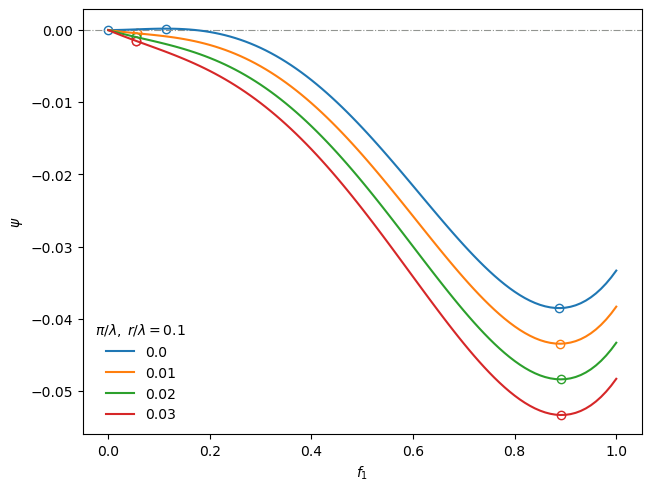

In [157]:
l, r = 1, 2/9
r = 0.242
# r = 0.1 # ..., 0.2219999 there seem to be no two wells with the same energy; even including the value at the transition
r = 0.1

f1s = np.arange(0.0, 1.01, 0.01)

magic_pi = poly3_magic_pi_sols(l, r)[0][1]

pis = [0.0, 0.01, 0.02, 0.03] # this pis are ok for r=0.242; pi = 0.01 yields the most similar minimums, with a precision of dpi = 5e-4
# colors = plt.cm.PuRd(np.linspace(0, 1, len(pis)))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][0:len(pis)+1]

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(1/3, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(2/3, ls='-.', lw=0.8, color='xkcd:gray')

for pi,color in zip(pis,colors):
    pot = potential(f1s, l, pi, r)
    ax.plot(f1s, pot, label=pi, color=color)
    sols_f1_Re, sols_f1_C = sols_deriv_potential(l, pi, r)
    sols_f1_Re = np.array(sols_f1_Re)
    print(sols_f1_C)
    ax.scatter(sols_f1_Re, potential(sols_f1_Re, l, pi, r), marker='o', edgecolors=color, color='xkcd:white')

# and magic pi
# pot = potential(f1s, l, magic_pi, r)
# ax.plot(f1s, pot, label=magic_pi, color='k')
# sols_f1_Re, sols_f1_C = sols_deriv_potential(l, magic_pi, r)
# sols_f1_Re = np.array(sols_f1_Re)
# print(sols_f1_C)
# ax.scatter(sols_f1_Re, potential(sols_f1_Re, l, magic_pi, r), marker='o', edgecolors='k', color='w')


ax.legend(title=fr'$\pi / \lambda, \; r/\lambda = {r}$', frameon=False)
# ax.set_ylim(-0.01, 0.01)
# ax.set_yscale('symlog')
ax.set(xlabel=r'$f_1$', ylabel=r'$\psi$')
# fig.savefig(f'potential_var_pil_l_{l}_r_{r}.png')

([-2.9657766648850936, 0.03738833244254702, 0.03738833244254687], [(-2.9657766648850936+0j), (0.03738833244254702-1.9781546421497133e-05j), (0.03738833244254687+1.9781546421201075e-05j)])


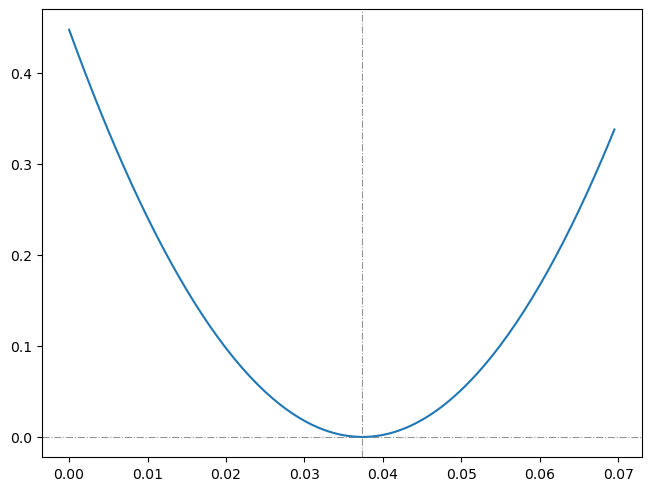

In [166]:
# model params: pi will be the one changing
l = 1
r = 0.242 # things happen below but close to pi = 0.02
r = 0.011
# r = 0.2219999
r = 0.297


pis = np.arange(0.0, 0.07, 0.0005)
magic_pi = poly3_magic_pi_sols(l, r)[0][1]

print(poly3_magic_pi_sols(l, r))

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
delta0, delta1 = poly3_Deltas(l, r, pis)
radicand = delta1**2 - 4*delta0**3
ax.plot(pis, radicand)
ax.axvline(magic_pi, color='xkcd:gray', lw=0.8, ls='-.')

In [164]:
pis = np.arange(0.0, 0.07, 0.0001)
real_parts, im_parts = [[],[],[]], [[],[],[]]
for pi in pis:
    sols_f1_Re, sols_f1_C = sols_deriv_potential(l, pi, r)
    for i in range(3):
        real_parts[i].append(sols_f1_Re[i]), im_parts[i].append(sols_f1_C[i].imag)

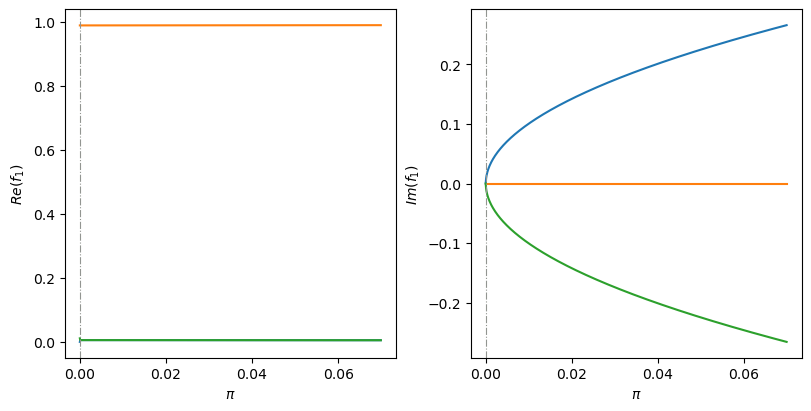

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)

ax[0].set_ylabel('$Re (f_1)$')
ax[1].set_ylabel('$Im (f_1)$')
for i in range(2):
    ax[i].set_xlabel('$\pi$')

for i in range(3):
    ax[0].plot(pis, real_parts[i])
    ax[1].plot(pis, im_parts[i])

ax[0].axvline(magic_pi, color='xkcd:gray', lw=0.8, ls='-.')
ax[1].axvline(magic_pi, color='xkcd:gray', lw=0.8, ls='-.')

# fig.savefig(f'solsf1_var_pil_l_{l}_r_{r}.png')


In [161]:
# using the solutions below "magic pi", which are Real, we can find the point where the two potential minimums have the same value
# the branches of the solution that converge are m=0 (lower f1 stable) and m=2 (mid f1 unstable)
# the branches of the solution we have to look where the mins are eual at are m=0,1

valid_pis = pis[pis <= magic_pi]
valid_sols_aux = [np.array(real_parts[i])[pis <= magic_pi] for i in range(3)]

valid_pis = np.append(valid_pis, magic_pi)
sol_Re_at_magic_pi, _ = sols_deriv_potential(l, magic_pi, r)

valid_sols = []
for sol,solmpi in zip(valid_sols_aux,sol_Re_at_magic_pi):
    sol = np.append(sol, solmpi)
    valid_sols.append(sol)

0.03853158339770374 0
0.0


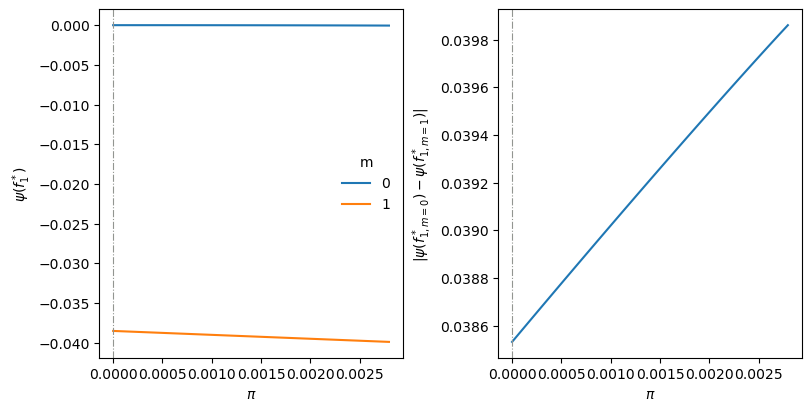

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)


ax[0].set(xlabel=r'$\pi$', ylabel=r'$\psi (f_1^*)$')
pot_at_sol_ms = []
branches_min = [0, 1]
for m in branches_min:
    pot_at_sol = []
    for pi,f1 in zip(valid_pis, valid_sols[m]):
        pot = potential(f1, l, pi, r)
        pot_at_sol.append(pot)
    pot_at_sol_ms.append(pot_at_sol)
    # ax.plot(valid_pis, pot_at_sol, label=m)
for i,m in enumerate(branches_min):
    ax[0].plot(valid_pis, pot_at_sol_ms[i], label=m)
ax[0].legend(title='m', frameon=False)


# Numerically find the pi value where the lines intersect
dif = np.array(pot_at_sol_ms[0]) - np.array(pot_at_sol_ms[1])
dif = abs(dif)
mindif, mindif_idx = np.min(dif), np.argmin(dif)
print(mindif, mindif_idx)
pi_tf = valid_pis[mindif_idx]
print(pi_tf)

ax[1].set(xlabel=r'$\pi$', ylabel=r'$| \psi (f_{1, m = 0}^*) - \psi (f_{1, m = 1}^*) |$')
ax[1].plot(valid_pis, dif)

ax[0].axvline(pi_tf, lw=0.8, color='xkcd:gray', ls='-.')
ax[1].axvline(pi_tf, lw=0.8, color='xkcd:gray', ls='-.')



In [124]:
print(valid_pis[mindif_idx-2:mindif_idx+3])
print(dif[mindif_idx-2:mindif_idx+3])

[0.0187 0.0188 0.0189 0.019  0.0191]
[5.88665682e-05 2.76768118e-05 3.45643722e-06 3.45324622e-05
 6.55505341e-05]


In [101]:
print(pot_at_sol_ms[0][0])
print(pot_at_sol_ms[1][0])

0.0
0.005208333333333336


### r/l: when does pi* stop having three solutions (and two become complex conjugates)?

In [168]:
def poly3_magic_pi_deltas(l, r):
    a = 4
    b = 4*(3*r + 2*l)
    c = 4*(3*r**2 + l**2 - 5*l*r)
    d =r**2 * (4*r - l)
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    return delta0, delta1


7.450580596923828e-09 963
0.2962999999999894


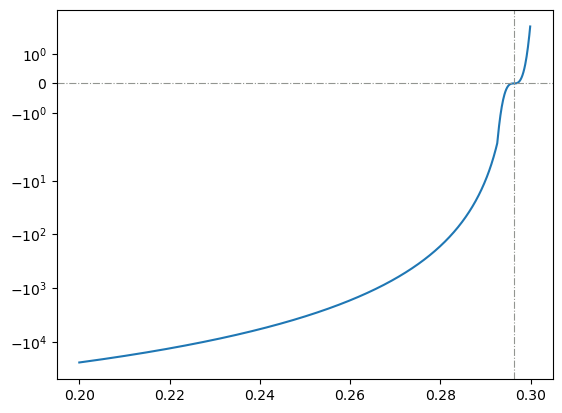

In [175]:
l = 1
rs = np.arange(0.2,0.3,0.0001)
delta0, delta1 = poly3_magic_pi_deltas(l, rs)
radicand = delta1**2 - 4*delta0**3

fig, ax = plt.subplots()
ax.plot(rs, radicand)
ax.set(yscale='symlog')
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')

# Numerically find the r value where the function becomes 0
dif = np.array(delta1)**2 - 4*np.array(delta0)**3
dif = abs(dif)
mindif, mindif_idx = np.min(dif), np.argmin(dif)
print(mindif, mindif_idx)
max_rl = rs[mindif_idx]
print(max_rl)
ax.axvline(max_rl, color='xkcd:gray', lw=0.8, ls='-.')